# Research Methodology (Summary)

# Week 6 Tasks

The embedding time delay controls the number of time periods between elements of each of the new column vectors. We sampled the EEG signals at 128Hz so in this week, we'll be setting the embedding time delay parameter to <b>128</b> and observing changes in correlation between EEG features and the BIS. Thus, the <code>generate_DFTParameters</code> and <code>generate_DWTParameters</code> functions will be modified accordingly.

Finally, we'll predict the BIS index using an assortment of machine learning algorithms.

<br/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Selection of Relevant features

In [3]:
eeg_df = pd.read_csv("eeg_data.csv")

eeg_df.head()

,SampenCA_4,Katz_cA_4,Katz_cD_2,SampenCD_2,SampenCD_2D,SampenCA_4D,Katz_cA_4D,Katz_cD_2D,SampenCA_4DS,SampenCD_2DS,Katz_cA_4DS,Katz_DeltaDS,Katz_cD_1DS,Permen_cD_3DS,Permen_GammaDS,Permen_cD_1DS,Hig_cA_4DS,BIS
0,1.118584,2.579210,3.842405,1.589795,0.295259,0.376660,2.975620,2.220077,0.308904,0.176011,1.847512,1.891554,1.815630,0.992431,0.993749,0.997721,1.812455,95.8
1,1.108791,2.427762,3.855503,1.578562,0.317506,0.404385,2.945514,2.231705,0.319252,0.182602,1.855281,1.886988,1.818783,0.993881,0.993224,0.997555,1.812594,95.8
2,1.111692,2.581948,3.533784,1.567324,0.342623,0.442947,2.975240,2.239327,0.328542,0.187470,1.858956,1.888266,1.821905,0.994908,0.992231,0.997616,1.810743,95.8
3,1.122940,2.260806,3.837354,1.594337,0.371085,0.492027,2.976338,2.246107,0.340638,0.192986,1.862032,1.883636,1.823571,0.996844,0.991169,0.998204,1.810351,95.6
4,1.091586,2.301977,3.401760,1.622987,0.403649,0.552274,2.993204,2.251073,0.337477,0.196044,1.863008,1.882063,1.824643,0.998060,0.990647,0.998105,1.808214,95.6


## Correlation Matrix

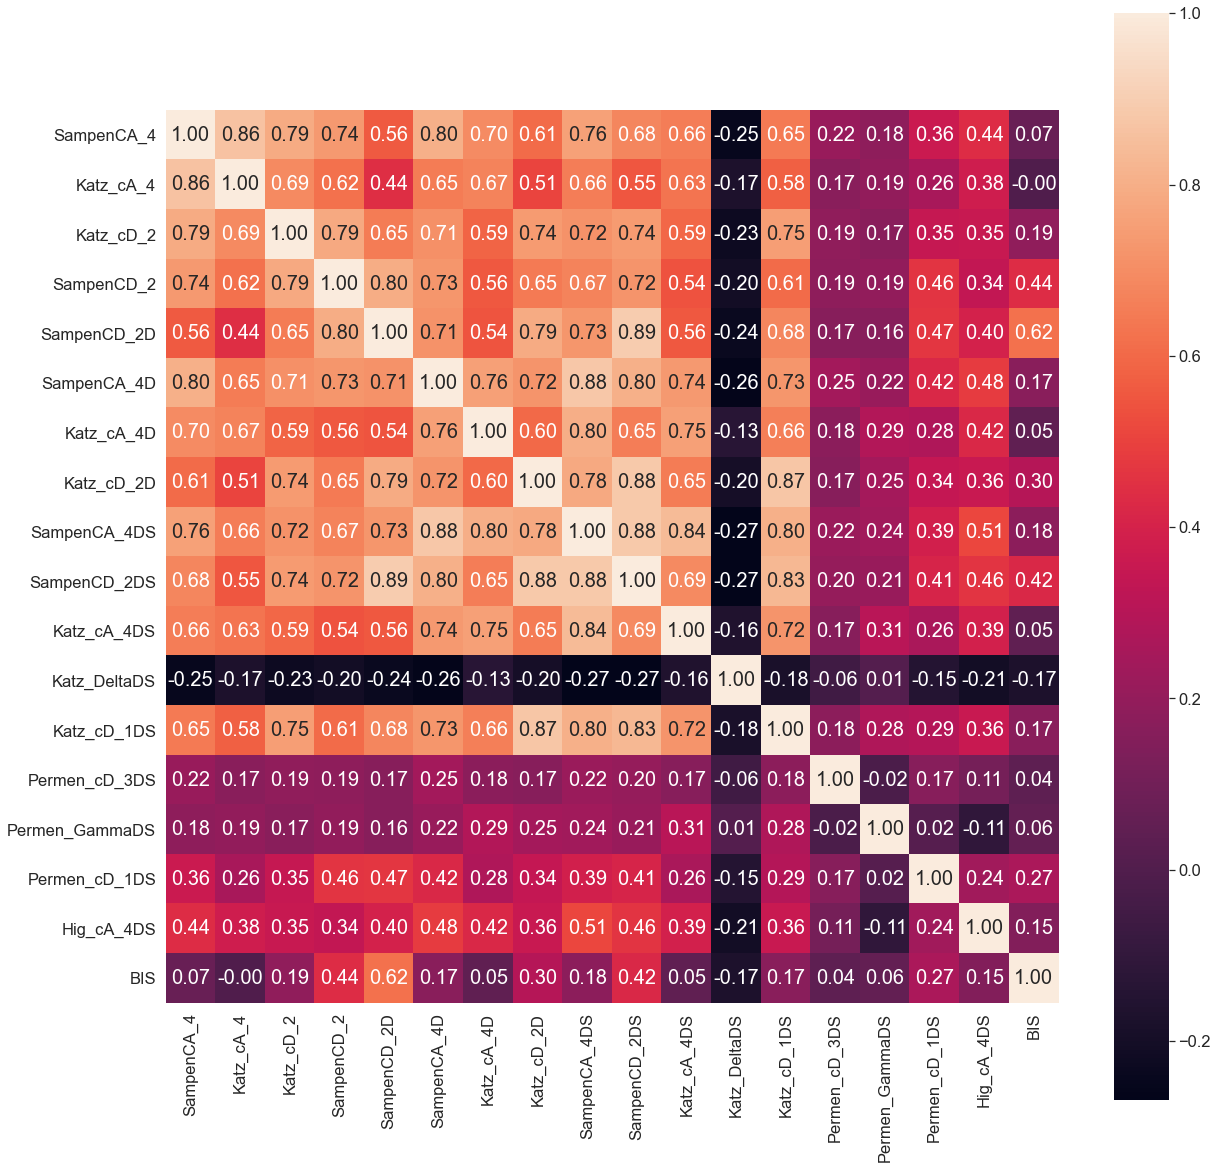

In [11]:
def correlation_matrix(df):    
    figure = plt.figure(figsize=(20, 20))
    cm = np.corrcoef(df[df.columns].values.T)
    sns.set(font_scale=1.5)

    # Heatmap
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size' : 20}, yticklabels=df.columns, xticklabels=df.columns)

    plt.show()
    
    
correlation_matrix(eeg_df)

<br/>

## Feature Selection and Multicollinearity

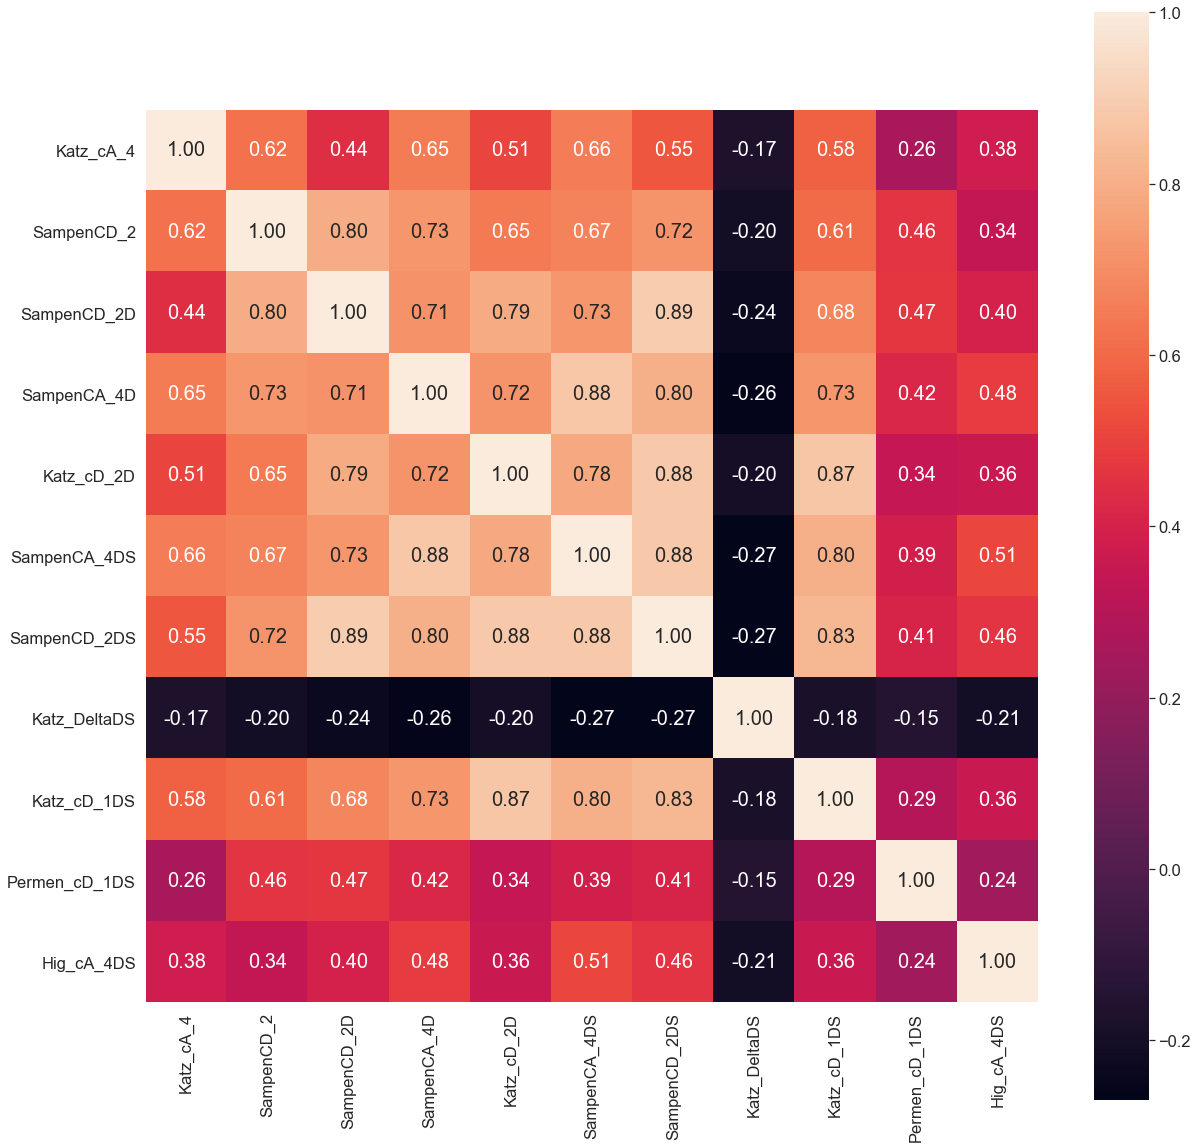

In [12]:
# Selected features
cols = ['Katz_cA_4', 'SampenCD_2', 'SampenCD_2D', 'SampenCA_4D', 'Katz_cD_2D', 'SampenCA_4DS', 'SampenCD_2DS', 'Katz_DeltaDS', 'Katz_cD_1DS', 'Permen_cD_1DS', 'Hig_cA_4DS']

# Checking for multicollinearity
correlation_matrix(eeg_df[cols])

<br/>

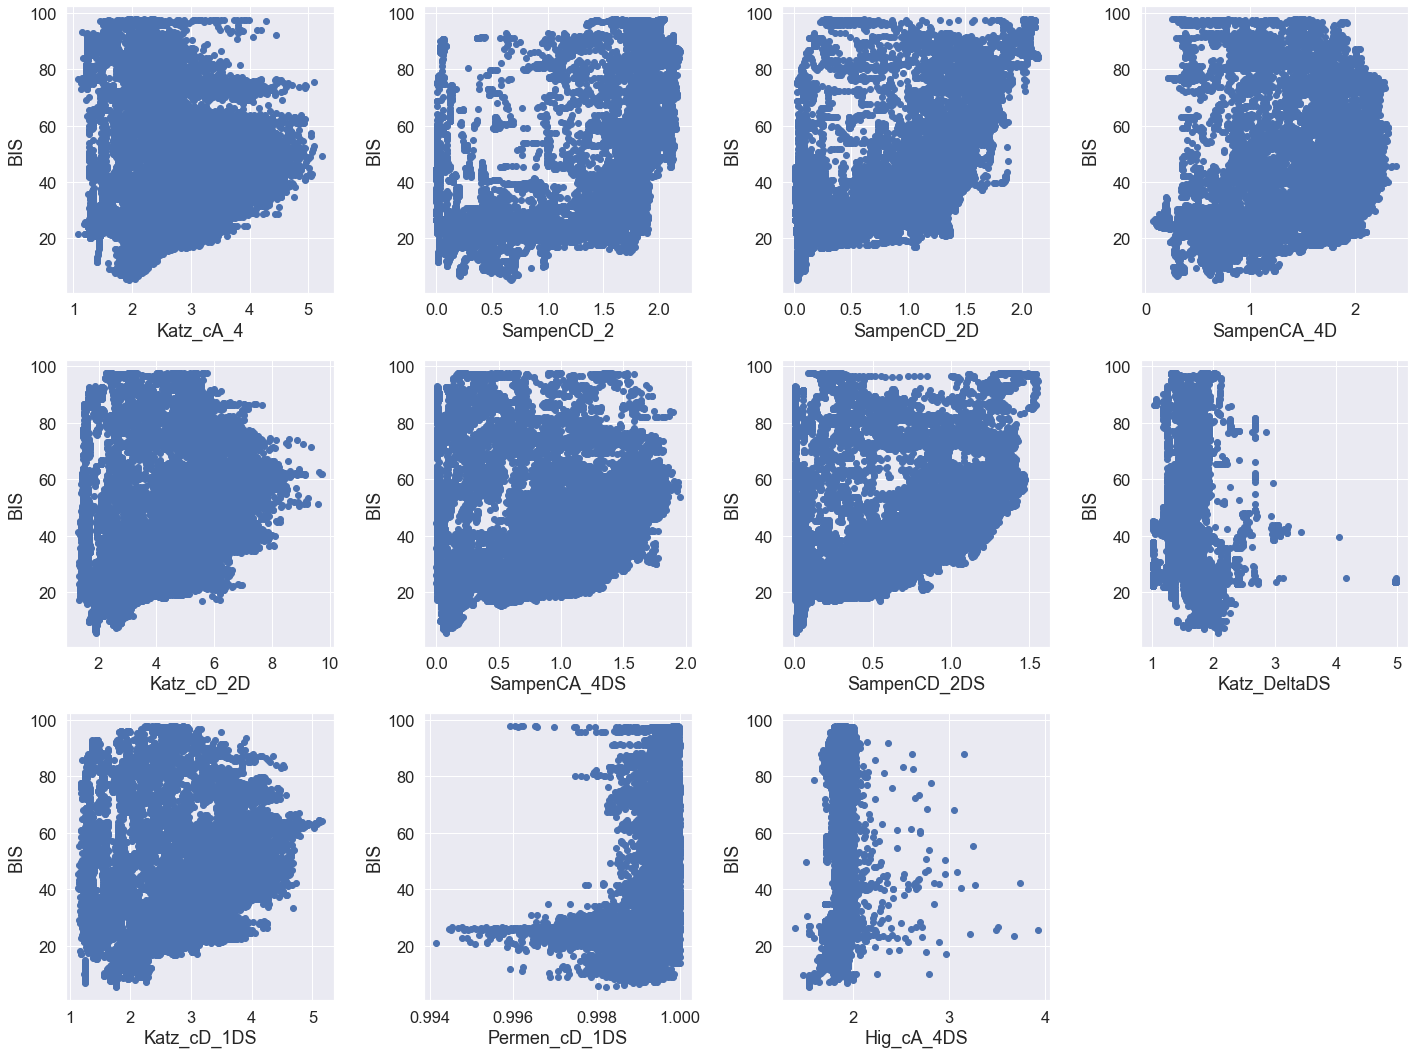

In [28]:
# Check the relationship between the selected features and the BIS
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

ax[2, 3].axis('off')

for idx, feature in enumerate(cols[:4]):
    ax[0, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[0, idx].set_ylabel('BIS')
    ax[0, idx].set_xlabel(feature)
    
for idx, feature in enumerate(cols[4:8]):
    ax[1, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[1, idx].set_ylabel('BIS')
    ax[1, idx].set_xlabel(feature)
    
for idx, feature in enumerate(cols[8:]):
    ax[2, idx].scatter(eeg_df[feature], eeg_df['BIS'])
    ax[2, idx].set_ylabel('BIS')
    ax[2, idx].set_xlabel(feature)
    
    
plt.tight_layout()
plt.show()

<br/>

# Model Building with the Selected Features

In [16]:
selected_features = ['Katz_cA_4', 'SampenCD_2D', 'SampenCA_4D', 'Katz_cD_2D', 'SampenCA_4DS', 'SampenCD_2DS', 'Katz_DeltaDS', 'Katz_cD_1DS', 'Permen_cD_1DS', 'Hig_cA_4DS']

In [30]:
training_data = eeg_df[selected_features]

In [56]:
def build_model(data, features, scale=True, model='lr'):
    if model == 'lr':
        X = data[features]
        y = data['BIS']
        
        # scale the variables
        if scale == True:
            scaled_X = StandardScaler()
            scaled_Y = StandardScaler()
            
            X_std = scaled_X.fit_transform(X)
            y_std = scaled_Y.fit_transform(y[:, np.newaxis]).flatten()
            
            # Perform regression
            lr = LinearRegression()
            lr.fit(X_std, y_std)
            
            # Predict using training data
            predictions = lr.predict(X_std)
            
            # Visualize
            figure = plt.figure(figsize=(15, 10))
            plt.plot(y_std, label="Actual BIS")
            plt.plot(predictions, label="Predicted BIS")
            plt.xlabel('Samples')
            plt.ylabel('BIS')
            plt.legend(loc='upper left')
            plt.title("Depth of Anaesthesia assessment with EEG")
            plt.show()
            
            
        
            
        
        
        
    

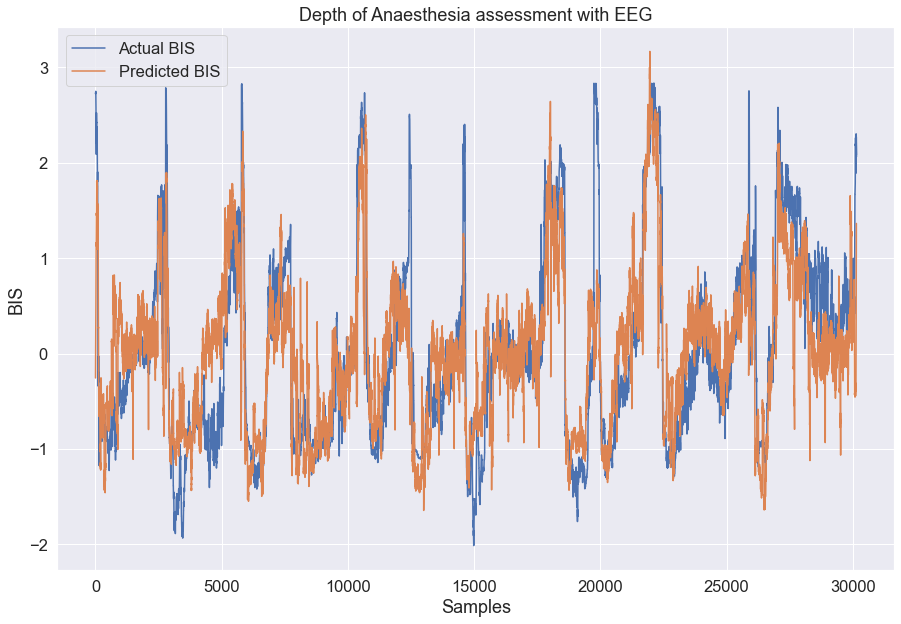

In [57]:
build_model(eeg_df, selected_features)

# Predicting the depth of anaesthesia for each patient

In [21]:
def create_patient_data(patient):    
    folders = ["Katz_CH2Squared", "SampEntropy", "Katz", "SampEntropy_CH2DenoisedSquared", "Katz_CH2DenoisedSquared", "PermEntropy_CH2DenoisedSquared", "Higuchi_CH2DenoisedSquared"]
    patient_dict = {}

    for folder in folders:
        df = pd.read_csv("./Class A train sets/{}/Modified/{}".format(folder, patient))

        patient_dict['BIS'] = df['BIS']

        # CH2^2 Folder
        if folder == "Katz_CH2Squared":
            patient_dict['Katz_cA_4'] = df['Katz_cA_4']

        # CH2Denoised Folders
        if folder ==  "SampEntropy":
            patient_dict['SampenCD_2D'] = df['SampenCD_2']
            patient_dict['SampenCA_4D'] = df['SampenCA_4']


        if folder ==  "Katz":
            patient_dict['Katz_cD_2D'] = df['Katz_cD_2']


        # CH2DenoisedSquared Folders
        if folder == "SampEntropy_CH2DenoisedSquared":
            patient_dict['SampenCA_4DS'] = df['SampenCA_4']
            patient_dict['SampenCD_2DS'] = df['SampenCD_2']


        if folder == "Katz_CH2DenoisedSquared":
            patient_dict['Katz_DeltaDS'] = df['Katz_Delta']
            patient_dict['Katz_cD_1DS'] = df['Katz_cD_1']


        if folder == "PermEntropy_CH2DenoisedSquared":
            patient_dict['Permen_cD_1DS'] = df['Permen_cD_1']


        if folder == "Higuchi_CH2DenoisedSquared":
            patient_dict['Hig_cA_4DS'] = df['Hig_cA_4']
            
            
    patient_dataset = pd.DataFrame(patient_dict)
    
    return patient_dataset


    
        
        

In [24]:
create_patient_data("13_EEG20100609.mat_modified.csv").shape

(2925, 11)